<a href="https://colab.research.google.com/github/jungyoojang/MachineLearning/blob/main/9_1_%EC%88%9C%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%99%80_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**순차 데이터**

텍스트, 시계열 데이터처럼 순서에 의미가 있는 데이터

지금까지 사용한 데이터는 순서와 상관이 없고 심지어 골고루 섞는 편이 결과가 더 좋음

순차 데이터는 순서를 유지하는 것이 중요함

따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요

완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없음

하나의 샘플을 사용하여 정방햔 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않음

**피드포워드 신경망**

입력데이터의 흐름이 앞으로만 전달되는 신경망

완전 연결 신경망과 합성곱 신경망이 포함

**순환 신경망**

신경망이 이전에 처리했던 뉴런의 출력이 다시 자기 자신에게 전달되도록 함

즉 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용하는 것

이전 타임스텝의 샘플을 기억하지만 타임스템이 오래될수록 순환되는 정보는 희미해짐

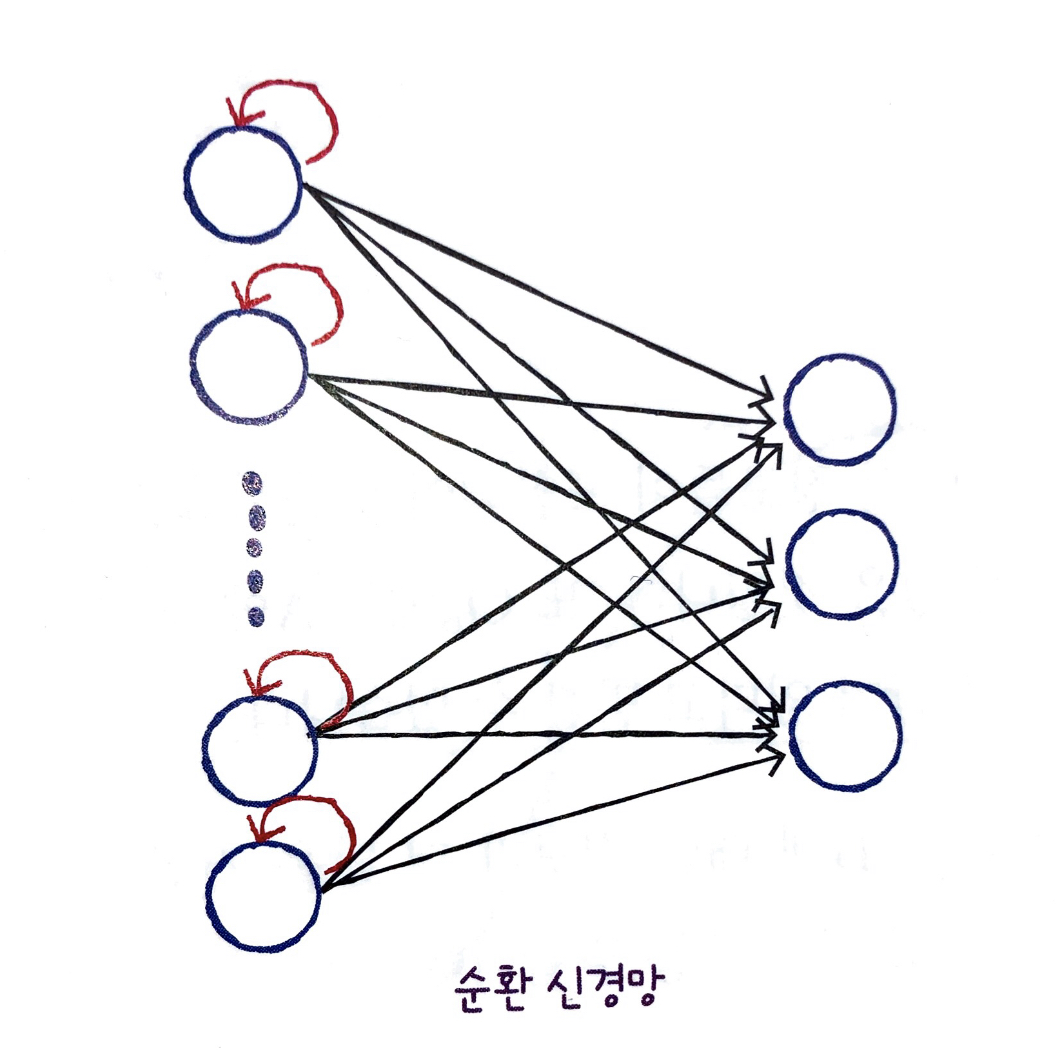

**타임 스텝**

이전 샘플의 학습 결과도 새 샘플과 같이 입력하여 학습을 수행하는 방법

샘플을 처리하는 한 단계




순환신경망에서는 층을 **셀**이라고 부름. 한 셀에는 여러 개의 뉴런이 있지만

완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현함.

 셀의 출력을 **은닉 상태**라고 부름

**타임스텝의 개수는???**

뉴런에 입력되는 데이터 횟수에 비례하여 증가함

은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 함수인 tanh가 많이 사용됨.

순환 신경망은 기존 신경망과 동일하며 추가적으로 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스템의 은닉 상태를 만듬.

**셀의 가중치**

순환 신경망의 셀에서 필요한 가중치 크기를 계산해보자

복잡한 모델의 가중치 개수를 계산함으로서 모델의 이해 정도를 알 수 있음

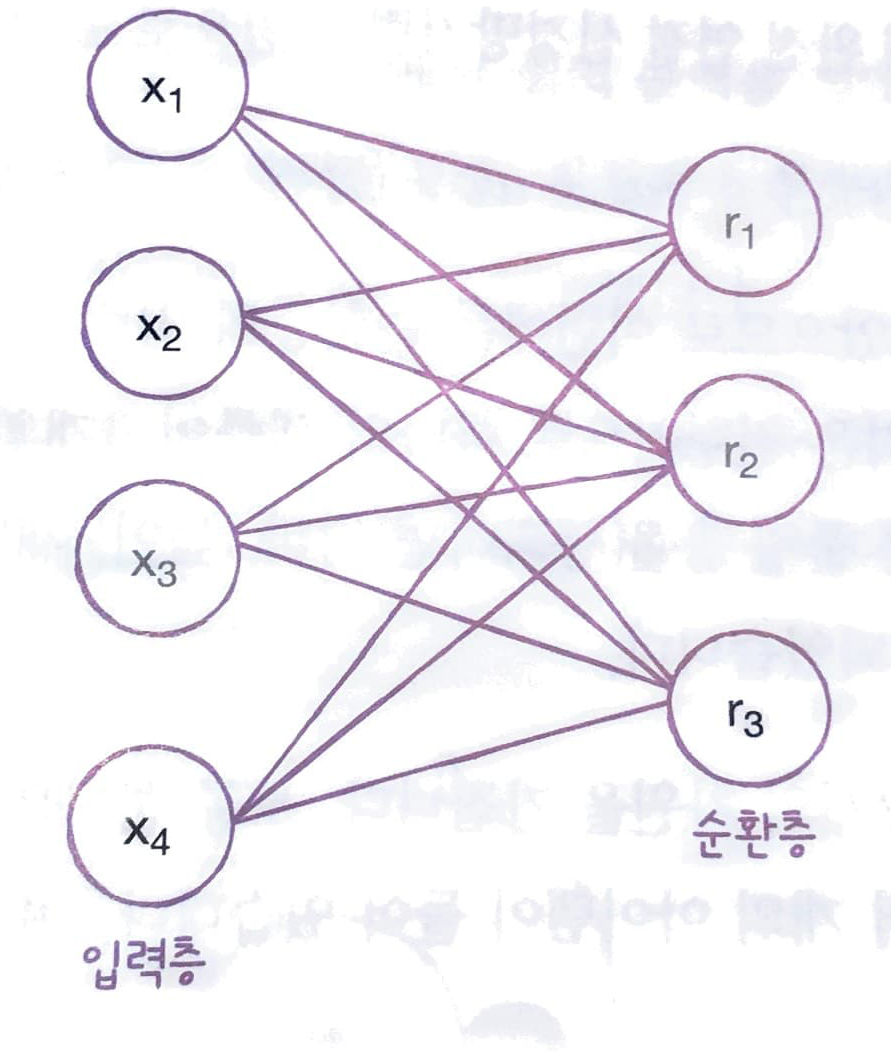

이 순환층의 가중치 크기는 4 * 3 = 12개임

이 순환층은 12 + 9 + 3 = 24개의 모델 파라미터를 가지고 있음

매우 복잡하여 이를 하나의 셀로 표현하기 어려우므로 순환층을 하나의 셀로 표현할 수 있음

**셀의 입출력**

합성곱 층의 입력의 전형적으로 하나의 샘플이 3개의 차원을 가짐

순환층은 일반적으로 샘플마다 2개의 차원을 가짐

보통 하나의 샘플은 시퀀스 길이와 단어 표현의 2차원 배열임

여기서 시퀀스의 길이가 바로 타임스텝의 길이가 됨

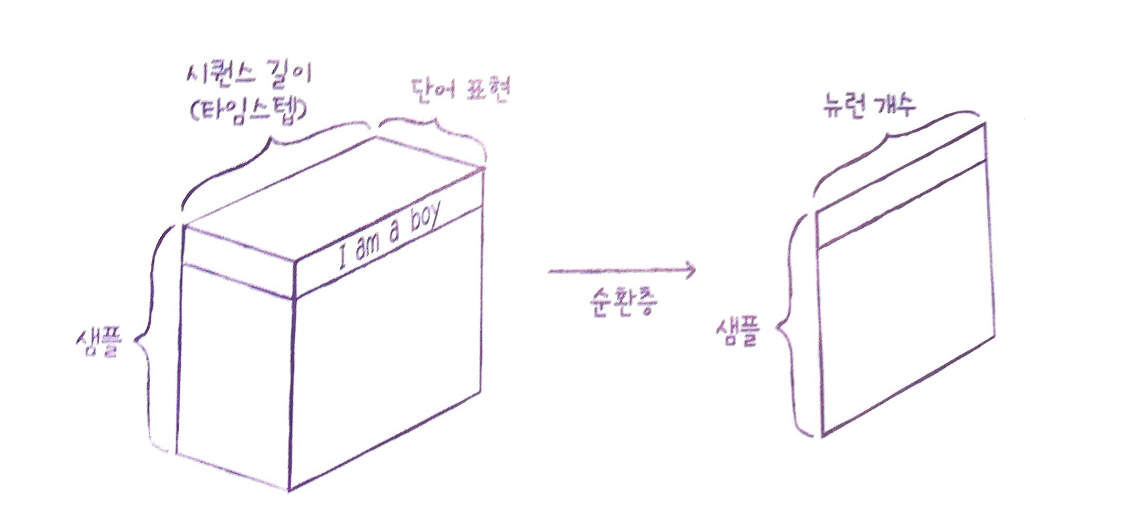

이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정됨

하나의 샘플은 시퀀스 길이와 단어 표현의 2차원 배열이며 순환층을 통과하면 1차원 배열로 바뀜

앞에서는 셀이 모든 타임스텝에서 출력을 만든것 처럼 표시함

하지만 사실 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보냄

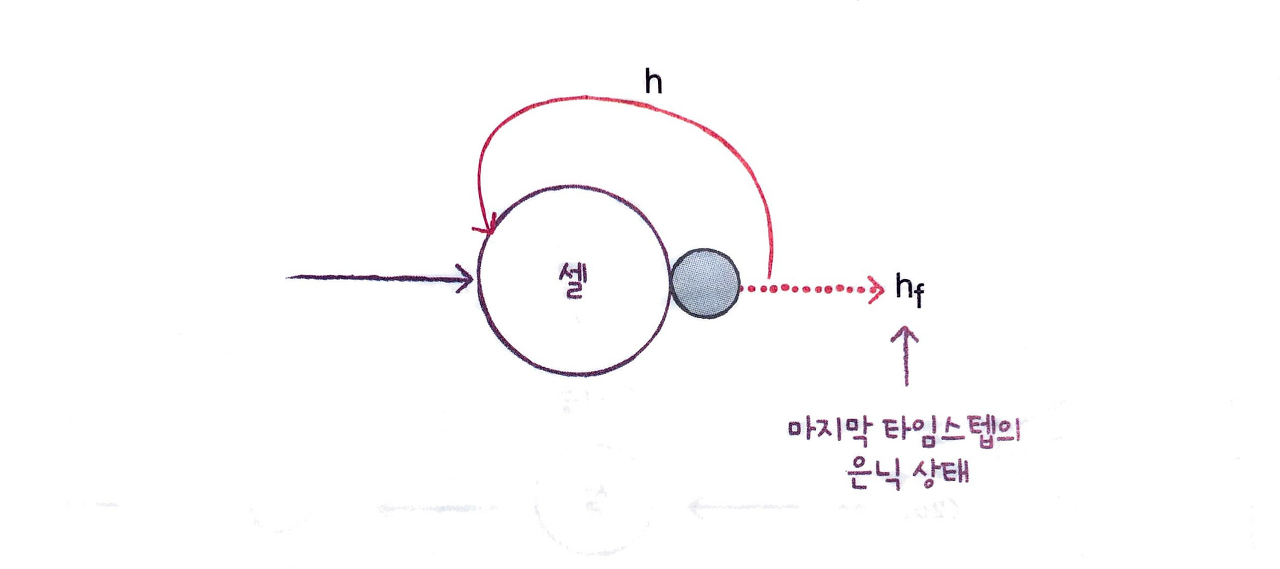

순환 신경망이 여러 개의 층을 쌓는다면?


셀의 입력은 샘플마다 타임 스텝과 단어 표현으로 이루어진 2차원의 배열임

그래서 여러 개의 층을 쌓는 경우에는 마지막 타임 스텝의 은닉 상태만 출력하는 것이 아니라,

마지막 셀을 제외한 다른 모든 셀이 모든 타입 스텝의 은닉 상태를 출력함

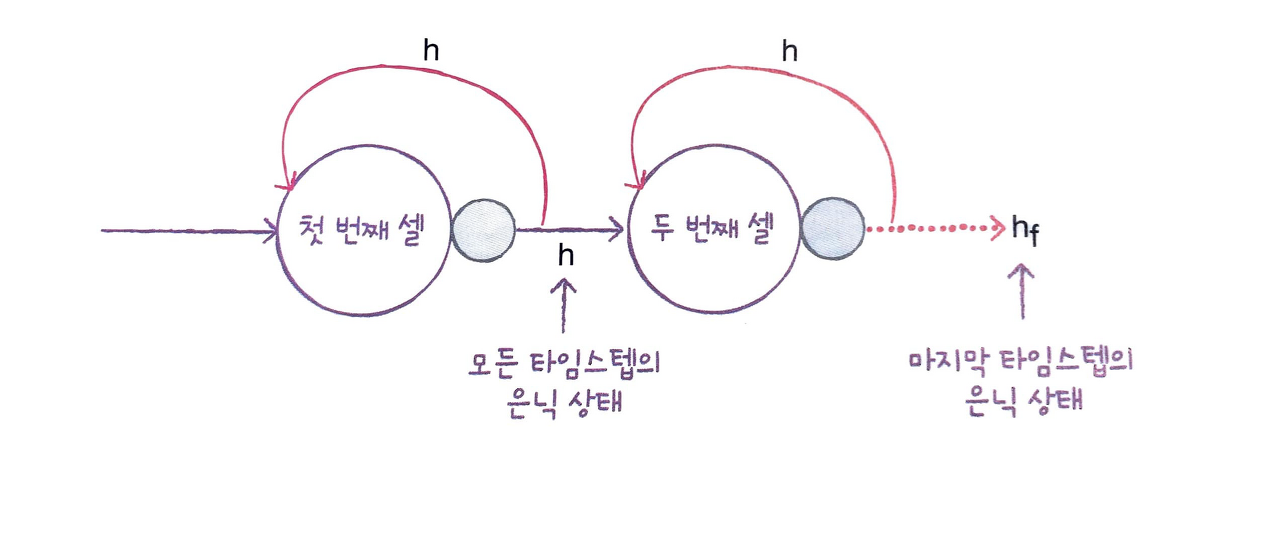

첫 번째 셀 : 모든 타임 스텝의 은닉 상태만 출력

두 번째 셀 (마지막 셀) : 마지막 타임 스텝의 은닉 상태만 출력

**출력층의 구성**

마지막에는 밀집층을 구성해 클래스를 분류

다중 분류 : 출력층에 클래스 개수만큼 뉴런을 두고 Softmax 활성화 함수를 사용

이진 분류 : 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용

순환 신경망의 마지막 셀의 출력은 1차원이므로 Flatten 층의 사용 없이 셀의 출력을 그대로 밀집층에 사용할 수 있음

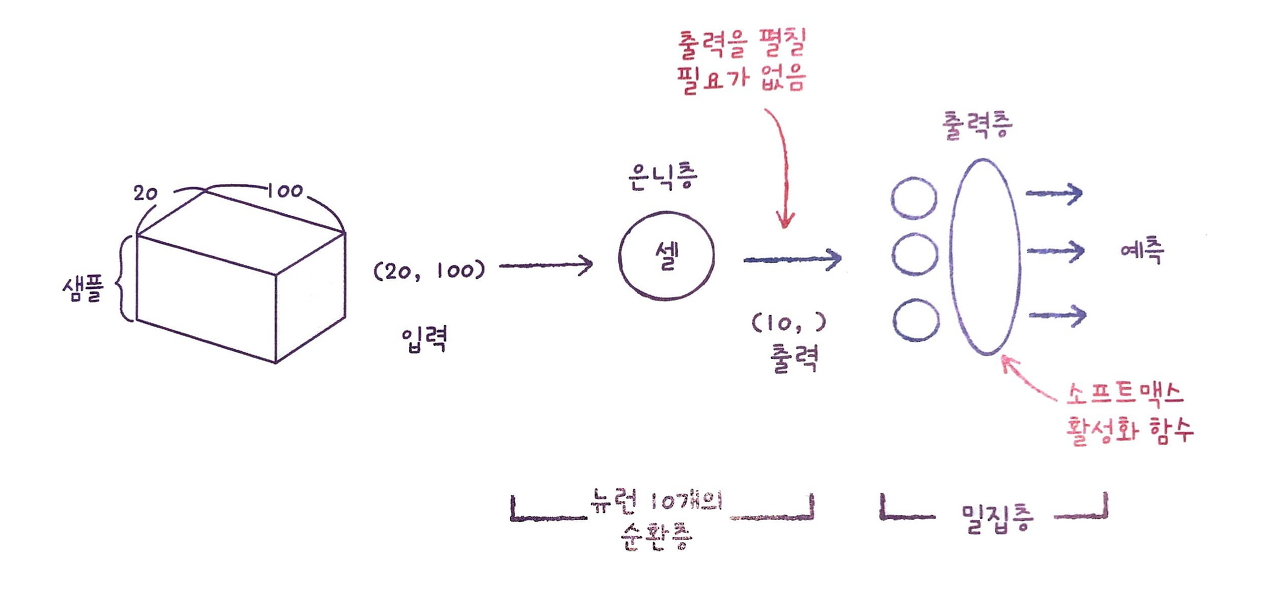

20개의 타임 스텝

각 타임 스텝은 100개의 표현/특성으로 구성됨

샘플은 순환층의 셀을 통과하면 최종적인 은닉 상태만 출력하게 됨

은닉 상태의 크기 = 셀에 있는 뉴런의 개수 = (10, )

위 그림은 3개의 클래스를 가진 다중 분류일 경우의 예시

전체적인 구조는 다른 신경망과 크게 다르지 않음.

입력에 가중치를 곱하고 절편을 더한 다음 활성화 함수를 통화시켜 다음 층으로 전달하는 것

하지만, 순환층을 이전 타입 스텝의 출력을 입력으로 함께 사용하며 마지막 타임 스텝의 출력만 다음 층으로 전달받는다는 것을 기억해야함